In [1]:
from ase.io import *
from ase import Atoms
from ase.calculators.mopac import *
from ase.optimize import *
from ase.visualize import view
from ase import md
from ase.md import *
from ase.neb import  *
from math import sqrt

In [2]:
# You should send it to us till Tuesday 06/01
# Discussion: Tu 06/06

In [3]:
# In this task you should use the nudged elastic band (NEB)for finding saddle points-
# -and minimum energy paths between reactant(A) and product(B). After finding the saddle point via NEB please confirm- 
# -that the point you have find through NEB is indeed a transition state?

# Hints: In addition to NEB part in lecture notes you can take a look to ase website for proper immplementation:- 
# - https://wiki.fysik.dtu.dk/ase/ase/neb.html


In [4]:

calc=Mopac(functional='PM6', job_type='NOANCI NOSYM CHARGE=-1 1SCF GRADIENTS AUX(0,PRECISION=9)', RELSCF=0.0001)

# Read initial and final states:
initial = read('input/A.xyz')
final = read('input/B.xyz')

# Make a band consisting of n images:
n=20
images = [initial]
images += [initial.copy() for i in range(n-2)]
images += [final]
neb = NEB(images)

# Interpolate linearly the potisions of the three middle images:
neb.interpolate()

# Set calculators:
for image in images:
    image.set_calculator(calc)

# Optimize:
optimizer = BFGS(neb, trajectory='output/A2B.traj')
optimizer.run(fmax=0.04, steps=10)

BFGS:   0  15:29:59       -2.955258       1.0162
BFGS:   1  15:30:22       -2.997930       0.9009
BFGS:   2  15:30:44       -3.052075       0.6340
BFGS:   3  15:31:07       -3.070574       0.4889
BFGS:   4  15:31:29       -3.084731       0.4734
BFGS:   5  15:31:52       -3.101980       0.2016
BFGS:   6  15:32:15       -3.104124       0.0868
BFGS:   7  15:32:38       -3.104172       0.0539
BFGS:   8  15:33:00       -3.104179       0.0350


In [5]:
eV_in_kcal_per_mol=6.022*3.82929
ei = [eV_in_kcal_per_mol*image.get_potential_energy() for image in images]
atomC=0 # C
atomA=4 #Cl
p=[image.get_distance(atomC, atomA) for image in images]

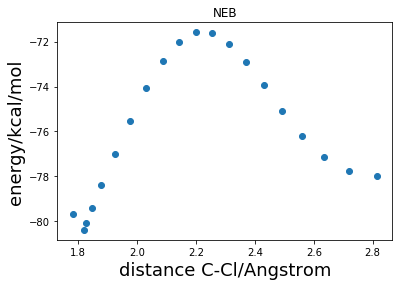

In [6]:
#Plotting NEB
import matplotlib.pyplot as pyplot
pyplot.title('NEB')
pyplot.ylabel('energy/kcal/mol',fontsize=18)        
pyplot.xlabel('distance C-Cl/Angstrom',fontsize=18)
pyplot.plot(p,ei,'o',label="scan")
pyplot.show()